In [1]:
import os, time, sys
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import telepix.telepix as telepix

!ping 192.168.10.16 -c 1

dut = telepix.TelePix()
dut.init()

PING 192.168.10.16 (192.168.10.16) 56(84) bytes of data.
64 bytes from 192.168.10.16: icmp_seq=1 ttl=64 time=0.111 ms

--- 192.168.10.16 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 0ms
rtt min/avg/max/mdev = 0.111/0.111/0.111/0.000 ms


2024-01-16 13:59:24,794 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing inj (firmware version: 1), module telepix.pulse_gen_div, base_addr 0x100
2024-01-16 13:59:24,795 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing ts_inj (firmware version: 2), module telepix.timestamp_div, base_addr 0x1c0
2024-01-16 13:59:24,796 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing gate (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x180
2024-01-16 13:59:24,796 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing sync (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x140
2024-01-16 13:59:24,796 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing gpio (firmware version: 0), module basil.HL.gpio, base_addr 0x200
2024-01-16 13:59:24,797 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing data_rx (firmware version: 1), module telepix.telepix_rx, base_addr

In [2]:
dut.reset_chip()

## Ampout, Hitbus

In [5]:
dut.set_conf(thpix=128,
             blpix=128,
             vcal=128)

col, row = 15, 0 
comp_mask = np.copy(dut.PixelConf['comp_mask'])
comp_mask[:,:] = 1
comp_mask[col, row] = 0
dut.set_comp(comp_mask)

#dut.set_tdac(0)

dut.set_inj_amp(0.5)  #  55Fe
dut.set_inj(inj_n=0, inj_width=50000, inj_delay=50000)  # period 10000clk = 250us(40MHz), 500us(20MHz)
dut.inject()
dut.set_en_ampout(cols=[col])
dut.set_en_inj(cols=[col], rows=[row])
dut.set_en_hitbus(cols=[col])

2024-01-16 14:01:37,438 - root - [ERROR   ] (MainThread) set_conf: arg error thpix
2024-01-16 14:01:37,443 - root - [INFO    ] (MainThread) set_conf: [{'VDAC_CONF': '40b0000000010000000000000000000000000010000'}, {'Ld': '1b1', 'Th': '8b00000000', 'BL': '8b00000000', 'vcal': '8b10000000', 'thfine': '8b00000000'}] 
2024-01-16 14:01:37,504 - root - [INFO    ] (MainThread) set_inj: inj_width=50000 inj_delay=50000 inj_phase=-1 inj_n=0 ext=0
2024-01-16 14:01:37,548 - root - [INFO    ] (MainThread) set_en_ampout: EnSFout=0x000000000000000000000000008000
2024-01-16 14:01:37,604 - root - [INFO    ] (MainThread) set_inj_en_colrow:InjEn=1 cols=000000000000000000000000008000, rows=[0]


VDAC_CONF [{'VDAC_CONF': '40b0000000010000000000000000000000000010000'}, {'Ld': '1b1', 'Th': '8b00000000', 'BL': '8b00000000', 'vcal': '8b10000000', 'thfine': '8b00000000'}]
CONF [{'CONF': '65b00010000100100110000000001010000111100111000000000000000000000001'}, {'Ld': '1b1', 'Ickdivend': '6b000000', 'Ickdivend2': '6b000000', 'Itimerend': '4b0000', 'Islowdownend': '4b0111', 'Imaxcycend': '6b011110', 'Iresetckdivend': '4b1010', 'Isendcounter': '1b0', 'Ickdivend3': '6b000000', 'ts_counter_ts1_6bit': '1b0', 'countsheeps': '1b0', 'Invert': '1b1', 'SelEx': '1b1', 'EnSlow': '1b0', 'EnPLL': '1b0', 'SelTSCk': '1b1', 'InjEn': '1b0', 'PCH': '1b0', 'RAMWrEnable': '1b1', 'WrRAM_Comp': '1b0', 'WrRAM_TDAC': '3b000', 'SelTSCkEx': '1b1', 'NC': '3b000'}]
CONF [{'CONF': '65b00010000001100110000000001010000111100111000000000000000000000001'}, {'Ld': '1b1', 'Ickdivend': '6b000000', 'Ickdivend2': '6b000000', 'Itimerend': '4b0000', 'Islowdownend': '4b0111', 'Imaxcycend': '6b011110', 'Iresetckdivend': '4b1010

2024-01-16 14:01:37,657 - root - [INFO    ] (MainThread) set_en_hb: EnHB=0x000000000000000000000000008000


Exception in thread TcpReadoutThread:
Traceback (most recent call last):
  File "/home/thirono/miniconda3/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/thirono/miniconda3/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/thirono/Nextcloud-kit/workspace/basil/basil/TL/SiTcp.py", line 428, in _tcp_readout
    data = self._sock_tcp.recv(1024 * 8)
ConnectionResetError: [Errno 104] Connection reset by peer


## Scurve scan


In [5]:
848/8

106.0

In [6]:
dut.set_inj(inj_n=100, inj_width=5000, inj_delay=5000)
dut.set_inj_amp(0.01, 'V')
dut.inject()
dut.set_ts_inj(en=True, reset=False)
dut.set_sync(nbits=7)
dut.set_rx()

2023-08-30 13:32:49,818 - root - [INFO    ] (MainThread) set_inj: inj_width=5000 inj_delay=5000 inj_phase=-1 inj_n=100 ext=0
2023-08-30 13:32:49,819 - root - [INFO    ] (MainThread) inj_amp: 54
2023-08-30 13:32:49,820 - root - [INFO    ] (MainThread) set_ts_inj:enable=1, reset_timestamp=False
2023-08-30 13:32:49,925 - root - [INFO    ] (MainThread) set_sync: sync_period=0x80 repeat=0 auto_sync=110 manual-sync=0
2023-08-30 13:32:49,933 - root - [INFO    ] (MainThread) set_rx: FIFO is not empty(1188), discarding the data...
2023-08-30 13:32:49,935 - root - [WARNING ] (MainThread) set_rx: aligned=0idle=None retry=0/10
2023-08-30 13:32:49,943 - root - [WARNING ] (MainThread) set_rx: aligned=0idle=None retry=0/10
2023-08-30 13:32:49,952 - root - [WARNING ] (MainThread) set_rx: aligned=1idle=0 retry=0/10
2023-08-30 13:32:49,961 - root - [WARNING ] (MainThread) set_rx: aligned=1idle=0 retry=0/10
2023-08-30 13:32:49,969 - root - [WARNING ] (MainThread) set_rx: aligned=1idle=0 retry=0/10
2023-0

In [8]:
import mightypix.scans.injection_scan as injection_scan
scan = injection_scan.InjectionScan(dut=dut)
injs=np.arange(0.1, 1.7, 0.01)
fraw = scan.start(inj=injs, cols=None, rows=None)
fhit = scan.analyze()

2023-08-16 17:50:20,827 - root - [INFO    ] (MainThread) Initializing InjectionScan
2023-08-16 17:50:20,827 - root - [INFO    ] (MainThread) Scan start time: 2023-08-16_17:50:20
2023-08-16 17:50:20,857 - root - [WARNING ] (MainThread) ScanBase.start:sender.init failed addr=tcp://127.0.0.1:6500
2023-08-16 17:50:20,857 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
2023-08-16 17:50:20,859 - root - [INFO    ] (MainThread) set_ts_inj:enable=1, reset_timestamp=False
2023-08-16 17:50:20,860 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:20,962 - root - [INFO    ] (MainThread) Received words: 0
2023-08-16 17:50:20,964 - root - [INFO    ] (MainThread) Data queue size: 0
2023-08-16 17:50:20,966 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2023-08-16 17:50:20,967 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2023-08-16 17:50:20,968 - root - [INFO    ] (MainThread) Discard counter:                0
2023-08-16 17:50:20,969 - root 

2023-08-16 17:50:21,947 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:21,978 - root - [INFO    ] (MainThread) InjectionScan: step=22 ts=300 hit=48
2023-08-16 17:50:21,980 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:21,982 - root - [INFO    ] (MainThread) inj_amp: 1802
2023-08-16 17:50:21,984 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:22,016 - root - [INFO    ] (MainThread) InjectionScan: step=23 ts=300 hit=66
2023-08-16 17:50:22,018 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:22,020 - root - [INFO    ] (MainThread) inj_amp: 1856
2023-08-16 17:50:22,021 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:22,053 - root - [INFO    ] (MainThread) InjectionScan: step=24 ts=300 hit=108
2023-08-16 17:50:22,056 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:22,060 - root - [INFO    ] (MainThread) inj_amp: 1911
2023-08-16 17:50:22,063 - root - [INFO    ] (

2023-08-16 17:50:23,122 - root - [INFO    ] (MainThread) inj_amp: 3167
2023-08-16 17:50:23,126 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:23,170 - root - [INFO    ] (MainThread) InjectionScan: step=48 ts=300 hit=200
2023-08-16 17:50:23,174 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:23,178 - root - [INFO    ] (MainThread) inj_amp: 3222
2023-08-16 17:50:23,181 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:23,225 - root - [INFO    ] (MainThread) InjectionScan: step=49 ts=300 hit=200
2023-08-16 17:50:23,228 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:23,231 - root - [INFO    ] (MainThread) inj_amp: 3276
2023-08-16 17:50:23,235 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:23,278 - root - [INFO    ] (MainThread) InjectionScan: step=50 ts=300 hit=200
2023-08-16 17:50:23,280 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:23,284 - root - [INFO    ]

2023-08-16 17:50:24,368 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:24,372 - root - [INFO    ] (MainThread) inj_amp: 4587
2023-08-16 17:50:24,375 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:24,418 - root - [INFO    ] (MainThread) InjectionScan: step=74 ts=300 hit=200
2023-08-16 17:50:24,421 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:24,424 - root - [INFO    ] (MainThread) inj_amp: 4642
2023-08-16 17:50:24,428 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:24,472 - root - [INFO    ] (MainThread) InjectionScan: step=75 ts=300 hit=200
2023-08-16 17:50:24,476 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:24,479 - root - [INFO    ] (MainThread) inj_amp: 4696
2023-08-16 17:50:24,482 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:24,525 - root - [INFO    ] (MainThread) InjectionScan: step=76 ts=300 hit=200
2023-08-16 17:50:24,528 - root - [INFO    ]

2023-08-16 17:50:25,561 - root - [INFO    ] (MainThread) InjectionScan: step=99 ts=300 hit=200
2023-08-16 17:50:25,562 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:25,565 - root - [INFO    ] (MainThread) inj_amp: 6007
2023-08-16 17:50:25,567 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:25,609 - root - [INFO    ] (MainThread) InjectionScan: step=100 ts=300 hit=200
2023-08-16 17:50:25,611 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:25,615 - root - [INFO    ] (MainThread) inj_amp: 6062
2023-08-16 17:50:25,619 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:25,652 - root - [INFO    ] (MainThread) InjectionScan: step=101 ts=300 hit=200
2023-08-16 17:50:25,654 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:25,656 - root - [INFO    ] (MainThread) inj_amp: 6116
2023-08-16 17:50:25,657 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:25,689 - root - [INFO   

2023-08-16 17:50:26,695 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:26,737 - root - [INFO    ] (MainThread) InjectionScan: step=125 ts=300 hit=200
2023-08-16 17:50:26,740 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:26,744 - root - [INFO    ] (MainThread) inj_amp: 7427
2023-08-16 17:50:26,747 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:26,780 - root - [INFO    ] (MainThread) InjectionScan: step=126 ts=300 hit=200
2023-08-16 17:50:26,785 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:26,789 - root - [INFO    ] (MainThread) inj_amp: 7482
2023-08-16 17:50:26,793 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:26,828 - root - [INFO    ] (MainThread) InjectionScan: step=127 ts=300 hit=200
2023-08-16 17:50:26,833 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:26,838 - root - [INFO    ] (MainThread) inj_amp: 7536
2023-08-16 17:50:26,843 - root - [INFO  

2023-08-16 17:50:27,865 - root - [INFO    ] (MainThread) inj_amp: 8792
2023-08-16 17:50:27,867 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:27,901 - root - [INFO    ] (MainThread) InjectionScan: step=151 ts=300 hit=200
2023-08-16 17:50:27,905 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:27,907 - root - [INFO    ] (MainThread) inj_amp: 8847
2023-08-16 17:50:27,910 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:27,942 - root - [INFO    ] (MainThread) InjectionScan: step=152 ts=300 hit=200
2023-08-16 17:50:27,946 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:27,949 - root - [INFO    ] (MainThread) inj_amp: 8901
2023-08-16 17:50:27,952 - root - [INFO    ] (MainThread) mask_rx: mask=False
2023-08-16 17:50:27,995 - root - [INFO    ] (MainThread) InjectionScan: step=153 ts=300 hit=200
2023-08-16 17:50:27,997 - root - [INFO    ] (MainThread) mask_rx: mask=True
2023-08-16 17:50:27,999 - root - [INFO  

0.41s 88671/88671 hit=13557 ts=16000
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE


### Scurve

mu 0.3393627975582073 sigma 0.02329912775947878


/tmp/ipykernel_15183/1162839157.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  col_mode = stats.mode(dat['col'])[0][0]


Text(0, 0.5, '#')

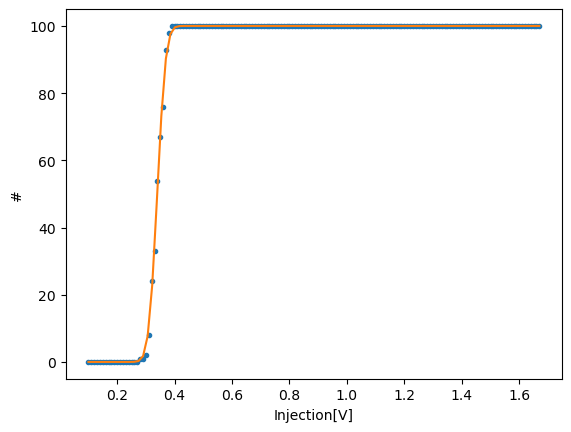

In [12]:
import mightypix.analysis.fitfunctions as fitfunctions
from scipy import stats

with tb.open_file(fhit) as f:
    dat = f.root.event_data[:]
col_mode = stats.mode(dat['col'])[0][0]
dat = dat[np.bitwise_and(dat['col']==col_mode, dat['row']==row)]

with tb.open_file(fraw) as f:
    param = f.root.scan_parameters[:]

uni, idx= np.unique(dat['timestamp'], return_index=True)
dat = dat[idx]
nhit = np.bincount(dat['event_number']) #, minlength=len(param))

x = param['inj'][:-2]
plt.plot(x, nhit[:-2], '.')
a, mu, sig, a_e, mu_e, sig_e = fitfunctions.fit_scurve(x, nhit[:-2], reverse=False)
xx = np.linspace(x[0],x[-1],100)
plt.plot(xx, fitfunctions.scurve(xx, a, mu,sig))
print('mu', mu, 'sigma', sig)
plt.xlabel('Injection[V]')
plt.ylabel('#')

### Timewalk

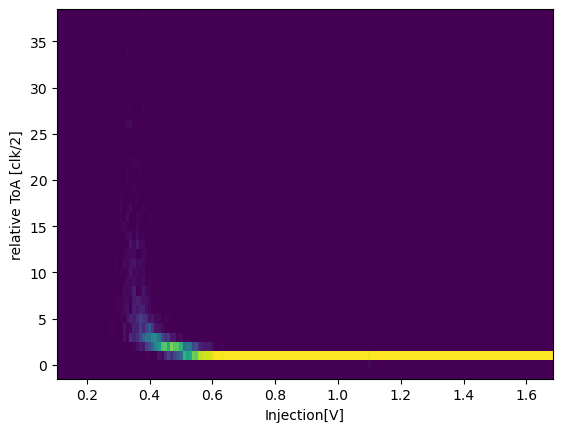

In [17]:
a = dat['toa']
b = dat['timestamp']>>3
toa = (a-b)&0xFF
toa = toa - min(toa)
inj = param['inj'][dat['event_number']]
xbins = (param['inj'][1:] + param['inj'][:-1])*0.5
ybins = np.arange(min(toa)-1.5, max(toa)+1.5, 1)
plt.hist2d(inj, toa, bins=[xbins,ybins])
plt.ylabel("relative ToA [clk/2]")
plt.xlabel("Injection[V]");